In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_labels = pd.read_csv('../datasets/train_labels.csv')

In [3]:
train_values = pd.read_csv('../datasets/train_values.csv')

### Porcentaje de la cantidad de edificaciones respecto a cada condición de superficie terrestre

In [4]:
porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie = train_values[['land_surface_condition','building_id']]

In [5]:
porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie = porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie\
 .groupby('land_surface_condition').count().rename(columns={'building_id':'cantidad_de_edificaciones'})

In [6]:
porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie

,cantidad_de_edificaciones
land_surface_condition,
n,35528
o,8316
t,216757


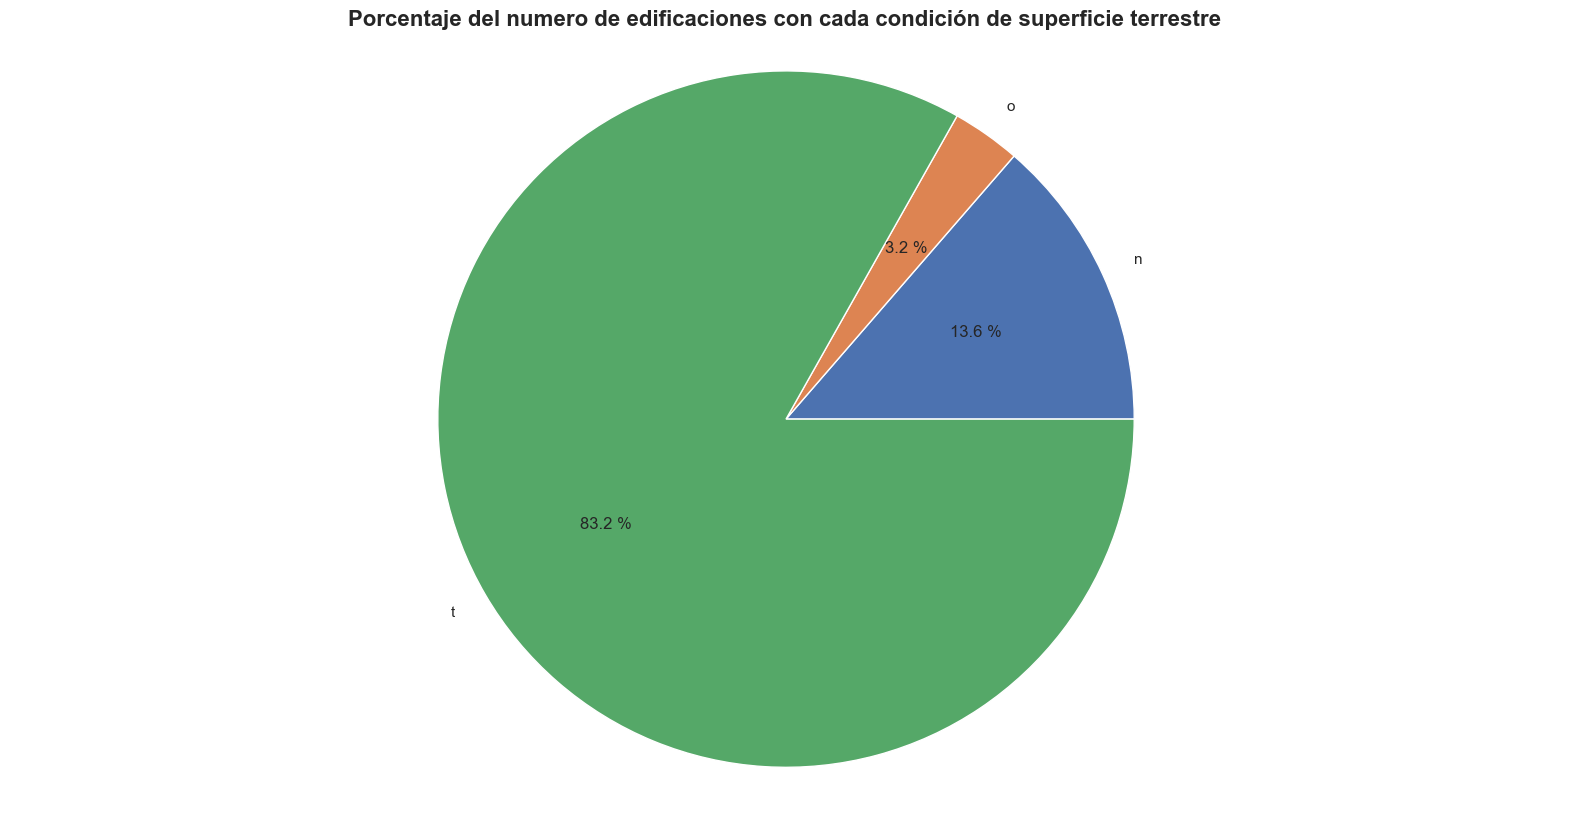

In [7]:
land_surface_condition = ['n','o','t']
porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie.reset_index()
plt.title('Porcentaje del numero de edificaciones con cada condición de superficie terrestre', fontsize=16, fontweight='bold')
plt.pie(porcentaje_de_cantidad_edificaciones_segun_cada_condicion_superficie['cantidad_de_edificaciones'], labels=land_surface_condition,autopct="%0.1f %%")
plt.axis("equal")
plt.show()

Podemos observar que el 83.2% de las edificaciones, se encuentran en una condición de superficie terrestre t

### Número de edificaciones con cada grado de daño segun la condición de la superficie terrestre

In [8]:
condicion_superficie_terrestre = train_values[['land_surface_condition','building_id']]

In [9]:
condicion_superficie_terrestre = train_labels.merge(condicion_superficie_terrestre)

In [10]:
condicion_superficie_terrestre = condicion_superficie_terrestre.groupby(['land_surface_condition','damage_grade']).count().\
    rename(columns={'building_id':'cantidad_de_edificaciones'})

In [11]:
condicion_superficie_terrestre

cantidad_de_edificaciones
land_surface_condition damage_grade                           
n                      1                                  2556
                       2                                 21484
                       3                                 11488
o                      1                                   602
                       2                                  4708
                       3                                  3006
t                      1                                 21966
                       2                                122067
                       3                                 72724

In [12]:
condicion_superficie_terrestre = condicion_superficie_terrestre.reset_index().\
 pivot(index='land_surface_condition', columns='damage_grade', values='cantidad_de_edificaciones')

In [13]:
condicion_superficie_terrestre

damage_grade,1,2,3
land_surface_condition,,,
n,2556,21484,11488
o,602,4708,3006
t,21966,122067,72724


Text(0, 0.5, 'Cantidad de edificaciones')

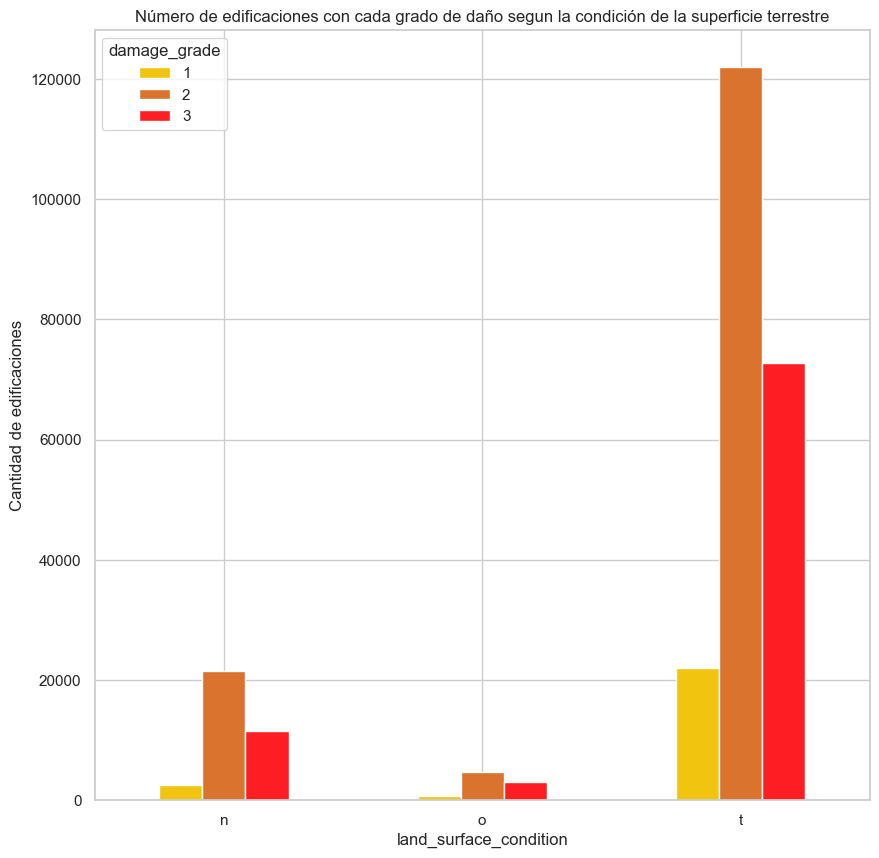

In [14]:
condicion_superficie_terrestre.plot(kind='bar',figsize=(10,10),\
        rot=0,title='Número de edificaciones con cada grado de daño segun la condición de la superficie terrestre',
                                   color={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' })
ax=plt.gca()
ax.set_xlabel('land_surface_condition')
ax.set_ylabel('Cantidad de edificaciones')

Tal cual se vio en el anterior gráfico de torta, la gran mayoría de edificación tienen una condición de superficie terrestre t, y vemos en el gráfico que la mayoría de esas edificaciones, tuvieron un tipo de daño 2

### Porcentaje del número de edificaciones con cada grado de daño segun el la condicion de superficie terrestre

In [15]:
land_surface_condition_percentage = train_values[['building_id','land_surface_condition']]
land_surface_condition_percentage = train_labels\
    .merge(land_surface_condition_percentage, how='inner')

In [16]:
damage_grade_land_surface_condition_percentage = land_surface_condition_percentage\
    .groupby(['land_surface_condition','damage_grade'])\
    .agg('count')\
    .reset_index()

total_buildings_by_land_surface_condition = land_surface_condition_percentage[['land_surface_condition', 'building_id']]\
    .groupby('land_surface_condition')\
    .count()\
    .reset_index()\
    .rename(columns= { 'building_id': 'total_buildings_by_land_surface_condition' } )

damage_grade_land_surface_condition_percentage = damage_grade_land_surface_condition_percentage\
    .merge(total_buildings_by_land_surface_condition)

damage_grade_land_surface_condition_percentage['percentage'] = (damage_grade_land_surface_condition_percentage['building_id'] * 100) / damage_grade_land_surface_condition_percentage['total_buildings_by_land_surface_condition']
df_grado_porcentaje_damage_grade = damage_grade_land_surface_condition_percentage
damage_grade_land_surface_condition_percentage[['land_surface_condition', 'damage_grade', 'percentage']]

,land_surface_condition,damage_grade,percentage
0,n,1,7.19
1,n,2,60.47
2,n,3,32.34
3,o,1,7.24
4,o,2,56.61
5,o,3,36.15
6,t,1,10.13
7,t,2,56.32
8,t,3,33.55


In [17]:
damage_grade_land_surface_condition_percentage = damage_grade_land_surface_condition_percentage\
    .pivot(index='land_surface_condition', columns='damage_grade',values='percentage')
damage_grade_land_surface_condition_percentage

damage_grade,1,2,3
land_surface_condition,,,
n,7.19,60.47,32.34
o,7.24,56.61,36.15
t,10.13,56.32,33.55


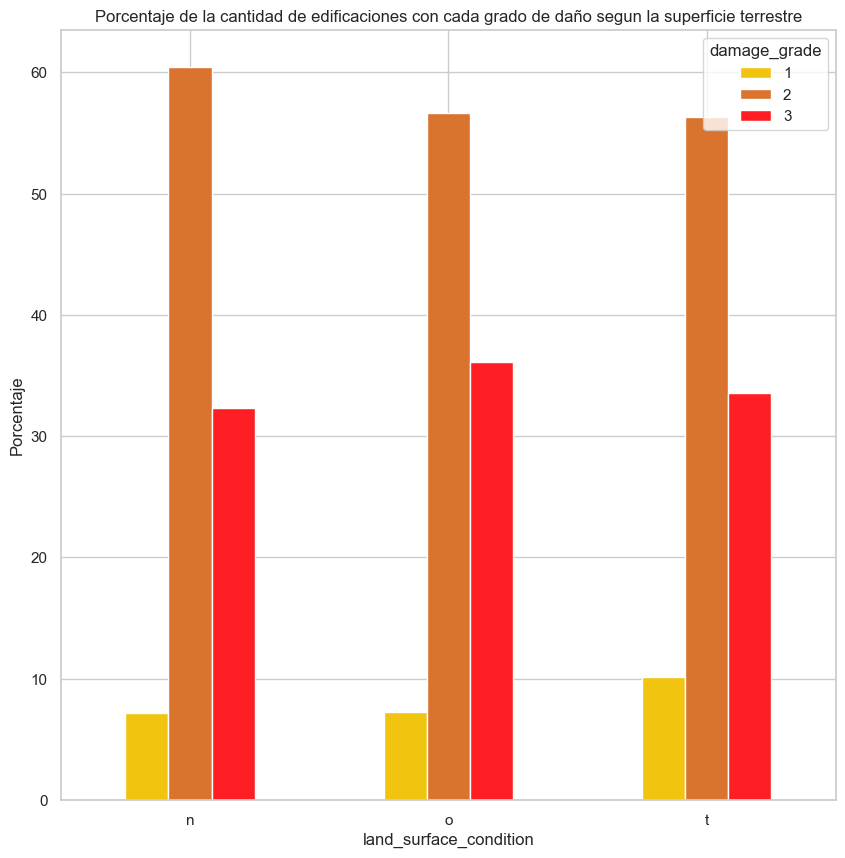

In [18]:
damage_grade_land_surface_condition_percentage.plot(kind='bar',figsize=(10,10), rot=0, \
 title='Porcentaje de la cantidad de edificaciones con cada grado de daño segun la superficie terrestre',
                                                   color={ 1: '#f1c40f', 2: '#da732e', 3: '#ff1e23' })
ax=plt.gca()
ax.set_xlabel('land_surface_condition')
ax.set_ylabel('Porcentaje');

El tipo de condición superficie terrestre en donde se encuentran la mayor parte de las edificaciones, es la condición t, vemos que más del 50% de las edificaciones que se encuentran en esta condición de superficie, sufrieron un grado de daño 2.

Otro dato importante que logramos ver en este gráfico, es que el 60% de las edificaciones que se encuentran en una condición de superficie terrestre n, sufrieron daño de grado 2. Poco más del 32.34% sufrieron un daño de grado 3 y tan solo 7.19% daño de grado 1

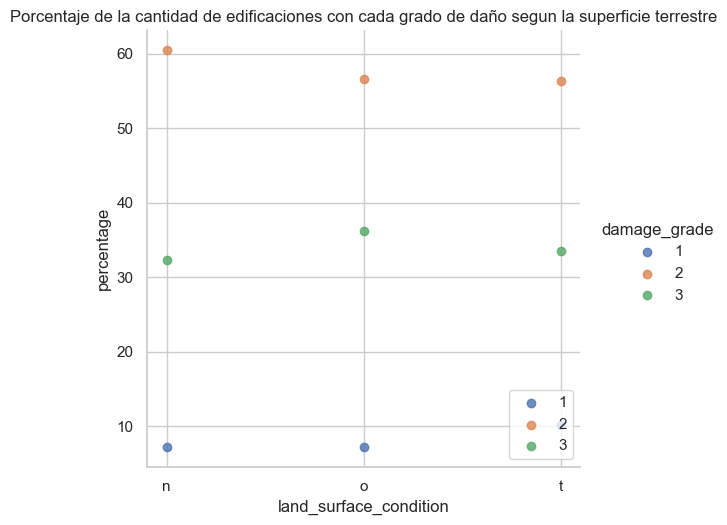

In [19]:
# library & dataset
import seaborn as sns
import matplotlib.pyplot as plt

#df_ages_and_damage_with_percentage_filtered = df_ages_and_damage_with_percentage.loc[df_ages_and_damage_with_percentage['age'] <= 100, :]
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="land_surface_condition", y="percentage", data=df_grado_porcentaje_damage_grade, \
           fit_reg=False, hue='damage_grade', legend=True)
 
# Move the legend to an empty part of the plot
plt.title('Porcentaje de la cantidad de edificaciones con cada grado de daño segun la superficie terrestre')
plt.legend(loc='lower right')

plt.show()

En este grafico se puede apreciar mejor, en la condicion de superficie n, más del 60% de las edificaciones sufrio una grado de daño 2.
En la condicion de superficie o, podemos observar que más del 50% de las edificaciones tuvieron tambien un daño de grado 2,
mientras que en la condicion t, el 10% de las edificaciones, sufrio un daño de grado 1

En conclusión, vemos que en las condiciones de superficies terrestre n, o y t, más del 50% de las edificaciones sufrieron daño de grado 2 en cada condición de superficie ( n: 60.47%, o: 56.61%, t :56.32% ),  ningún tipo de condición de superficie terrestre superó excesivamente los 10% de daño de grado 1( n: 7.19%, o: 7.24%, t :10.13% ).
